# Logistic回归
优点：计算代价不高，易于理解和实现

缺点：容易欠拟合，分类精度可能不高

适用数据类型：数值型和标称型数据（非数值型数据可以用数值作为标签进行代替）

我们需要的函数，期望具备特性为，某个范围输出0，其他范围输出1，但并不期望为阶跃式函数。

Sigmoid函数具备0到1之间的过渡，刚好适用这种情况。

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

```octave
#octave作图
x = [-20:0.1:20];
y = 1 ./ (1 .+ e .^(-x));
plot(x,y)
```

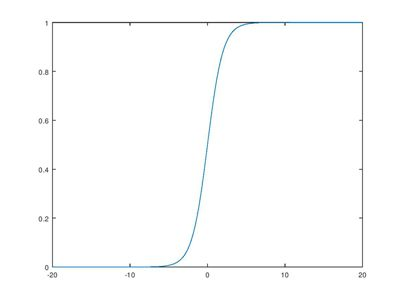

显然，当x为0时，Sigmoid函数值为0.5，\\(|x|\\)接近4时，即发生跳跃至0或1

Sigmoid函数输入记为z:

$$z =w_0x_0+w_1x_1+...+w_nx_n$$

向量写法：\\(z=W^TX\\) (字母大写代表矩阵)

# 梯度上升法

如果梯度记为\\(\nabla\\),则函数f(x,y)的梯度表示为：


$$\nabla{f(x,y)}=\left( \begin{matrix}
\frac{\partial{f(x,y)}}{\partial{x}} \\\\
\frac{\partial{f(x,y)}}{\partial{y}}
\end{matrix} \right)
$$

x,y都是特征，函数即目标值

用向量来表示梯度算法的迭代公式如下：
$$w:=w+\alpha{\nabla_w}f(w)$$

\\(\alpha\\)记做步长

沿着x的方向移动$$\frac{\partial{f(x,y)}}{\partial{x}}$$

沿着y的方向移动$$\frac{\partial{f(x,y)}}{\partial{y}}$$


In [2]:
from numpy import *
def loadDataSet():
    dataMat =[]
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [3]:
def sigmoid(inX):
      return 1.0/(1+exp(-inX))

In [4]:
def gradAscent(dataMatIn,classLabels):
    dataMatrix = mat(dataMatIn) 
    labelMat = mat(classLabels).transpose() #标签转置
    m,n = shape(dataMatrix) #m样本数，n特征数
    alpha = 0.001 #学系率
    maxCycles = 500 #迭代次数
    weights = ones((n,1)) #梯度上升初始化权重为1
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights) 
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose()*error #dataMatrix.transpose()即为输入数据，而输入数据是对f(w)的求导得
    return array(weights)

In [10]:
def plotBestFit(dataArr,labelMat,weights):
    import matplotlib.pyplot as plt
    """
    dataArr:样本数据的特征
    labelMat:样本数据的类别标签，即目标变量
    weights:回归系数
    """
    n = shape(dataArr)[0]
    xcord1 = [];ycord1 = []
    xcord2 = [];ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x = arange(-3.0,3.0,0.1)
    """
    w0*x0+w1*x1+w2*x2=f(x) ，y即画图时的x2，x0=1
    y=(-w0-w1*x)/w2
    """
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X');plt.ylabel('Y')
    plt.show()

In [13]:
def testLR():
    dataMat,labelMat = loadDataSet()
    dataArr =  array(dataMat)
    weights = stocGradAscent1(dataArr,labelMat)
    plotBestFit(dataArr,labelMat,weights)
testLR()

<Figure size 640x480 with 1 Axes>

In [21]:
def stocGradAscent0(dataMatrix,classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m): #可以把range设置从参数里取范围，这样就可以用于增量更新weights
        h = sigmoid(sum(dataMatrix[i]*weights)) #sum即求f(x)
        error = classLabels[i] - h #这里即实际值-计算值
        print(weights,"*"*10,dataMatrix[i],"*"*10,error)
        weights = weights + alpha * dataMatrix[i] * error
    return weights
        

In [12]:
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    import random
    m,n = shape(dataMatrix)
    weights = ones(n) 
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0 + j + i)+0.0001 #比较自由设定的学习递减方式
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
#             del(dataIndex[randIndex])
    return weights

# 氙气病预测病马死亡率
对于特征值缺少采样数据的部分
1. 使用特征值的均值进行补充
2. 使用特殊值如:-1
3. 忽略有缺失值的样本
4. 考虑其他算法

对于线性回归，如果将某个缺失的特征值设置为0，则该特征的weights不做更新

In [30]:
#读取github样本与测试数据
testSet='https://raw.githubusercontent.com/RedstoneWill/MachineLearningInAction-Camp/master/Week3/Reference%20Code/Ch05/testSet.txt'
horseColicTest='https://raw.githubusercontent.com/RedstoneWill/MachineLearningInAction-Camp/master/Week3/Reference%20Code/Ch05/horseColicTest.txt'
horseColicTraining='https://raw.githubusercontent.com/RedstoneWill/MachineLearningInAction-Camp/master/Week3/Reference%20Code/Ch05/horseColicTraining.txt'
def gettxt(file):
    import requests
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.0 Safari/537.36'
    }
    rg=requests.get(file,headers=headers)
    """
    with open(file.split('/')[-1],'w') as fr:
        fr.write(rg.text)
    """
    rg.text.split()
    return rg.text.strip().split('\n')
# gettxt(horseColicTraining)


['2.000000\t1.000000\t38.500000\t66.000000\t28.000000\t3.000000\t3.000000\t0.000000\t2.000000\t5.000000\t4.000000\t4.000000\t0.000000\t0.000000\t0.000000\t3.000000\t5.000000\t45.000000\t8.400000\t0.000000\t0.000000\t0.000000',
 '1.000000\t1.000000\t39.200000\t88.000000\t20.000000\t0.000000\t0.000000\t4.000000\t1.000000\t3.000000\t4.000000\t2.000000\t0.000000\t0.000000\t0.000000\t4.000000\t2.000000\t50.000000\t85.000000\t2.000000\t2.000000\t0.000000',
 '2.000000\t1.000000\t38.300000\t40.000000\t24.000000\t1.000000\t1.000000\t3.000000\t1.000000\t3.000000\t3.000000\t1.000000\t0.000000\t0.000000\t0.000000\t1.000000\t1.000000\t33.000000\t6.700000\t0.000000\t0.000000\t1.000000',
 '1.000000\t9.000000\t39.100000\t164.000000\t84.000000\t4.000000\t1.000000\t6.000000\t2.000000\t2.000000\t4.000000\t4.000000\t1.000000\t2.000000\t5.000000\t3.000000\t0.000000\t48.000000\t7.200000\t3.000000\t5.300000\t0.000000',
 '2.000000\t1.000000\t37.300000\t104.000000\t35.000000\t0.000000\t0.000000\t6.000000\t2.00

In [31]:
def classifyVector(inX,weights):
    """
    调节sigmoid函数的输出阈值
    """
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

In [35]:
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t') #根据"\t"将每行划分成列表，元素都是str，需要转换
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))#转换成float
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet),trainingLabels,500)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr),trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print("The error rate of this test is :%f"% errorRate)
    return errorRate


In [36]:
def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is:%f" % (numTests,errorSum/float(numTests)))
multiTest()

The error rate of this test is :0.313433
The error rate of this test is :0.313433
The error rate of this test is :0.328358
The error rate of this test is :0.283582
The error rate of this test is :0.268657
The error rate of this test is :0.313433
The error rate of this test is :0.343284
The error rate of this test is :0.238806
The error rate of this test is :0.283582
The error rate of this test is :0.253731
after 10 iterations the average error rate is:0.294030
